#Import Packages

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#Import Data

#####Load Dataset

In [0]:
data = pd.read_csv('air_bnb.csv')

#####Obeservasi Dataset



*   mengecek fitur data dan kelas



In [153]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26




*   mengecek info data



In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              22552 non-null  int64  
 1   name                            22493 non-null  object 
 2   host_id                         22552 non-null  int64  
 3   host_name                       22526 non-null  object 
 4   neighbourhood_group             22552 non-null  object 
 5   neighbourhood                   22552 non-null  object 
 6   latitude                        22552 non-null  float64
 7   longitude                       22552 non-null  float64
 8   room_type                       22552 non-null  object 
 9   price                           22552 non-null  int64  
 10  minimum_nights                  22552 non-null  int64  
 11  number_of_reviews               22552 non-null  int64  
 12  last_review                     



*   mengecek deskripsi kolom data


In [155]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.255200e+04,2.255200e+04,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,18638.000000,22552.000000,22552.000000
mean,1.571560e+07,5.403355e+07,52.509824,13.406107,67.143668,7.157059,17.840679,1.135525,1.918233,79.852829
std,8.552069e+06,5.816290e+07,0.030825,0.057964,220.266210,40.665073,36.769624,1.507082,3.667257,119.368162
min,2.015000e+03,2.217000e+03,52.345803,13.103557,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,8.065954e+06,9.240002e+06,52.489065,13.375411,30.000000,2.000000,1.000000,0.180000,1.000000,0.000000
50%,1.686638e+07,3.126711e+07,52.509079,13.416779,45.000000,2.000000,5.000000,0.540000,1.000000,4.000000
75%,2.258393e+07,8.067518e+07,52.532669,13.439259,70.000000,4.000000,16.000000,1.500000,1.000000,129.000000
max,2.986735e+07,2.245081e+08,52.651670,13.757642,9000.000000,5000.000000,498.000000,36.670000,45.000000,365.000000


#Data Cleansing



*   mengecek data duplikat



In [156]:
print(f'Duplicate : {data.duplicated().sum()}')
data[~data.duplicated()].shape

Duplicate : 0


(22552, 16)



*   mengecek data NaN, Null, maupun Missing Values



In [157]:
data.isna().sum()

id                                   0
name                                59
host_id                              0
host_name                           26
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       3908
reviews_per_month                 3914
calculated_host_listings_count       0
availability_365                     0
dtype: int64



*   menghapus baris yang memiliki NaN,Null, maupub Missing Vallues


In [158]:
data = data.dropna()
data.shape

(18587, 16)



*   mengecek kembali data NaN, Null, Missing Values



In [159]:
data.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

#Eksperimen 1

#####Data Exploration



*   Melakukan pengurangan jumlah kolom



In [160]:
data1 = data.drop(['id','name','host_id','host_name','neighbourhood_group','neighbourhood','latitude','longitude','last_review','reviews_per_month'],axis=1)
data1.head()

,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Entire home/apt,60,4,118,4,141
1,Private room,17,2,6,1,0
2,Entire home/apt,90,62,143,1,220
3,Private room,26,5,25,1,297
4,Private room,42,2,197,1,26




*   Mengecek label data



In [161]:
data1['room_type'].value_counts()

Private room       9534
Entire home/apt    8835
Shared room         218
Name: room_type, dtype: int64



*   Untuk clustering, kita tidak membutuhkan label. Karena kita tidak mengidentifikasi label. Oleh karena itu, di drop.


In [162]:
dataWithoutLabels = data1.drop(['room_type'], axis = 1)
dataWithoutLabels.head()


,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,60,4,118,4,141
1,17,2,6,1,0
2,90,62,143,1,220
3,26,5,25,1,297
4,42,2,197,1,26




*   Melihat info data values



In [163]:
dataWithoutLabels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18587 entries, 0 to 22536
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   price                           18587 non-null  int64
 1   minimum_nights                  18587 non-null  int64
 2   number_of_reviews               18587 non-null  int64
 3   calculated_host_listings_count  18587 non-null  int64
 4   availability_365                18587 non-null  int64
dtypes: int64(5)
memory usage: 871.3 KB




*   Mengecek fitur yang akan digunakan untuk clustering. Oleh karena itu, kita cek bagaiman relasi antar data tersebut.



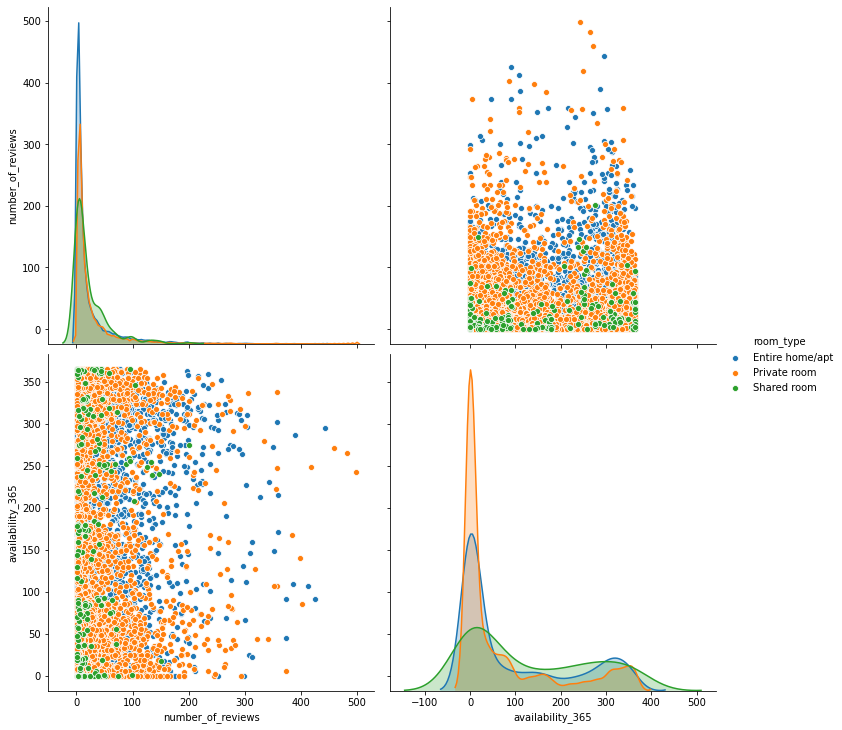

In [164]:
sns.pairplot(data1.loc[:,['number_of_reviews','availability_365', 'room_type']], hue = "room_type", height = 5)
plt.show()



*   Tampilan ralasi antar fitur tanpa label yang kita tetapkan.


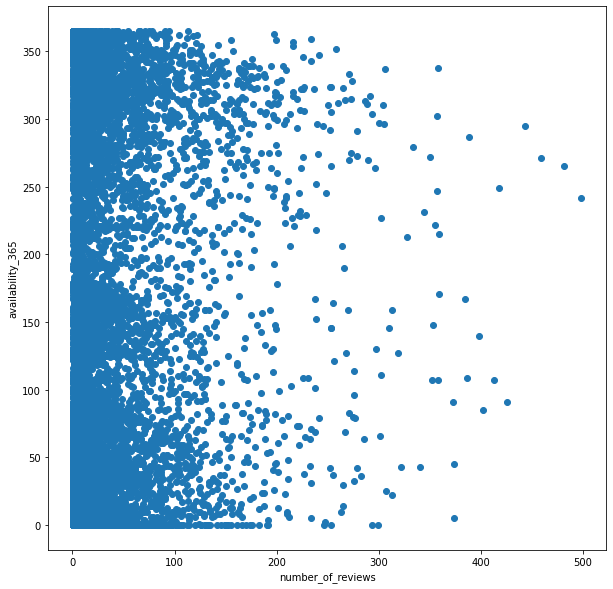

In [165]:
plt.figure(figsize = (10, 10))
plt.scatter(dataWithoutLabels["number_of_reviews"], dataWithoutLabels["availability_365"])
plt.xlabel('number_of_reviews')
plt.ylabel('availability_365')
plt.show()

#####K-Mean Clustering



*   Definisikan K centers dan cluster data
*   Menetapkan random centroids
*   Nilai data cluster berdasarkan jarak dari centroids(eucliden distance)
*   Melakukan pengulangan langkah sebelumnya hingga posisi centroids tidak berubah
* WCSS itu adalah matrik yang digunakan untuk penyeleksian nilai K. Setelah proses ini, elbow method digunakan untuk K value.



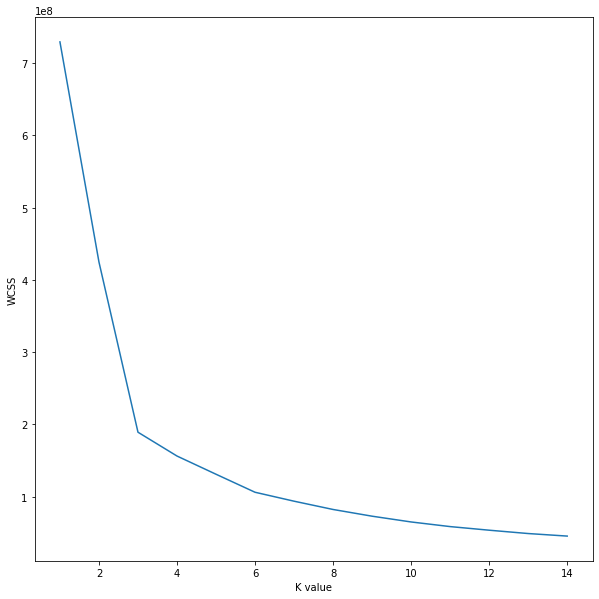

In [166]:
wcss = [] 

for k in range(1, 15):
    kmeansForLoop = KMeans(n_clusters = k)
    kmeansForLoop.fit(dataWithoutLabels)
    wcss.append(kmeansForLoop.inertia_)

plt.figure(figsize = (10, 10))
plt.plot(range(1, 15), wcss)
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()



*   Nilai Elbow dimulai dari 2


In [167]:
dataWithoutLabels = data1.loc[:,['number_of_reviews','availability_365']]
kmeans = KMeans(n_clusters = 2)
clusters = kmeans.fit_predict(dataWithoutLabels)
dataWithoutLabels["type"] = clusters
dataWithoutLabels["type"].unique()


array([0, 1], dtype=int32)



*   Plot data setelah K = 2 clustering



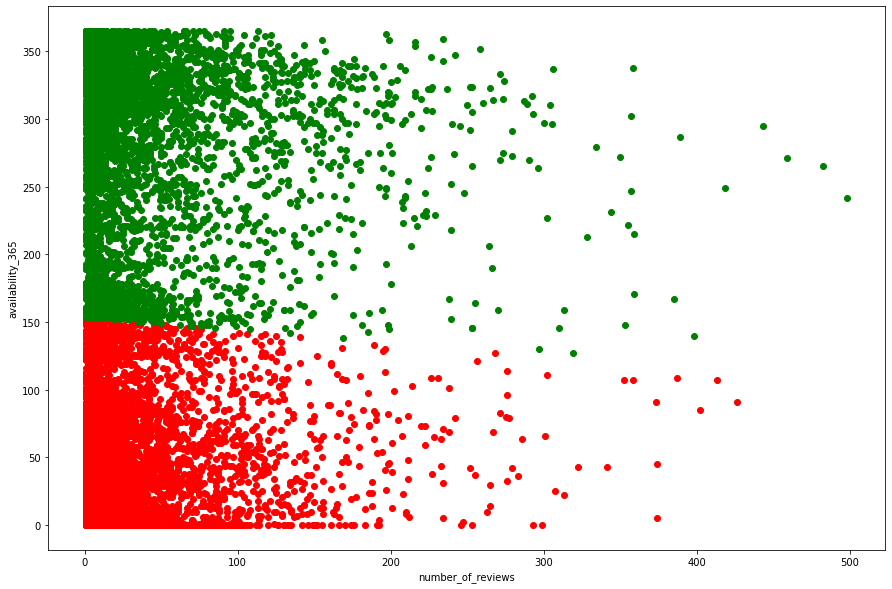

In [169]:
plt.figure(figsize = (15, 10))
plt.scatter(dataWithoutLabels["number_of_reviews"][dataWithoutLabels["type"] == 0], dataWithoutLabels["availability_365"][dataWithoutLabels["type"] == 0], color = "red")
plt.scatter(dataWithoutLabels["number_of_reviews"][dataWithoutLabels["type"] == 1], dataWithoutLabels["availability_365"][dataWithoutLabels["type"] == 1], color = "green")
plt.xlabel('number_of_reviews')
plt.ylabel('availability_365')
plt.show()




*   Data centroids berada di tengah cluster scatters



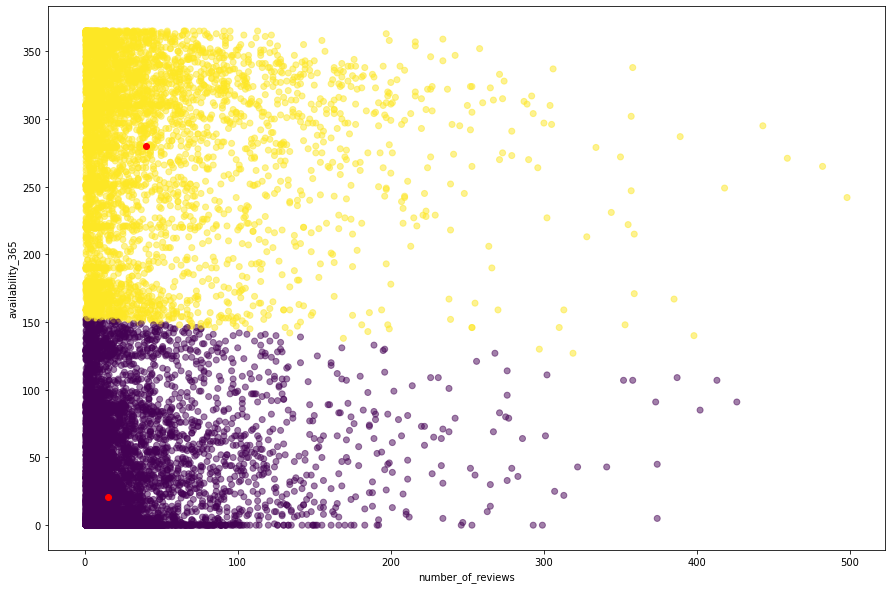

In [170]:
plt.figure(figsize = (15, 10))
plt.scatter(dataWithoutLabels["number_of_reviews"], dataWithoutLabels["availability_365"], c = clusters, alpha = 0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = "red", alpha = 1)
plt.xlabel('number_of_reviews')
plt.ylabel('availability_365')
plt.show()

In [171]:
dataWithoutDiagnosis = data1.drop(["room_type"], axis = 1)
scalar = StandardScaler()
kmeans = KMeans(n_clusters = 2)
pipe = make_pipeline(scalar, kmeans)
pipe.fit(dataWithoutDiagnosis)
labels = pipe.predict(dataWithoutDiagnosis)
df = pd.DataFrame({'labels': labels, "room_type" : data1['room_type']})
ct = pd.crosstab(df['labels'], df['room_type'])
print(ct)

room_type  Entire home/apt  Private room  Shared room
labels                                               
0                     6076          7610          127
1                     2759          1924           91


#Eksperimen 2

#####Data Exploration



*   Melakukan pengurangan jumlah kolom

In [172]:
data2 = data.drop(['id','name','host_id','host_name','neighbourhood_group','neighbourhood','latitude','longitude','last_review','reviews_per_month','calculated_host_listings_count'],axis=1)
data2.head()

,room_type,price,minimum_nights,number_of_reviews,availability_365
0,Entire home/apt,60,4,118,141
1,Private room,17,2,6,0
2,Entire home/apt,90,62,143,220
3,Private room,26,5,25,297
4,Private room,42,2,197,26




*   Mengecek label data



In [173]:
data2['room_type'].value_counts()

Private room       9534
Entire home/apt    8835
Shared room         218
Name: room_type, dtype: int64



*   Untuk clustering, kita tidak membutuhkan label. Karena kita tidak mengidentifikasi label. Oleh karena itu, di drop.


In [175]:
dataWithoutLabels = data2.drop(['room_type'], axis = 1)
dataWithoutLabels.head()

,price,minimum_nights,number_of_reviews,availability_365
0,60,4,118,141
1,17,2,6,0
2,90,62,143,220
3,26,5,25,297
4,42,2,197,26




*   Melihat info data values



In [176]:
dataWithoutLabels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18587 entries, 0 to 22536
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   price              18587 non-null  int64
 1   minimum_nights     18587 non-null  int64
 2   number_of_reviews  18587 non-null  int64
 3   availability_365   18587 non-null  int64
dtypes: int64(4)
memory usage: 1.3 MB




*   Mengecek fitur yang akan digunakan untuk clustering. Oleh karena itu, kita cek bagaiman relasi antar data tersebut.



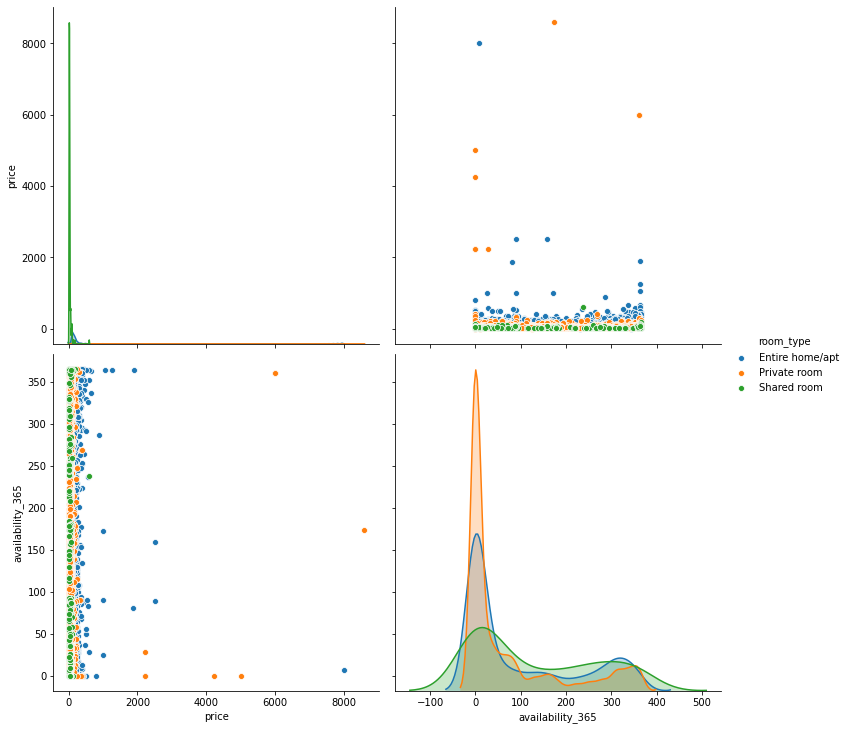

In [177]:
sns.pairplot(data2.loc[:,['price','availability_365', 'room_type']], hue = "room_type", height = 5)
plt.show()



*   Tampilan ralasi antar fitur tanpa label yang kita tetapkan.


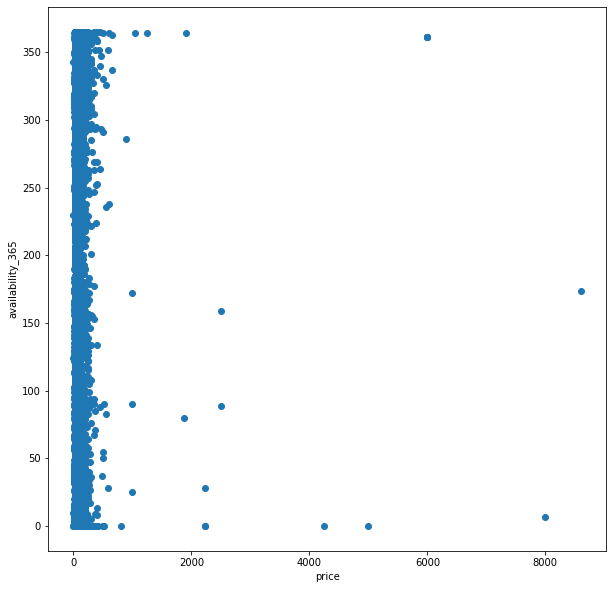

In [178]:
plt.figure(figsize = (10, 10))
plt.scatter(dataWithoutLabels["price"], dataWithoutLabels["availability_365"])
plt.xlabel('price')
plt.ylabel('availability_365')
plt.show()

#####K-Mean CLustering



*   Definisikan K centers dan cluster data
*   Menetapkan random centroids
*   Nilai data cluster berdasarkan jarak dari centroids(eucliden distance)
*   Melakukan pengulangan langkah sebelumnya hingga posisi centroids tidak berubah
* WCSS itu adalah matrik yang digunakan untuk penyeleksian nilai K. Setelah proses ini, elbow method digunakan untuk K value.



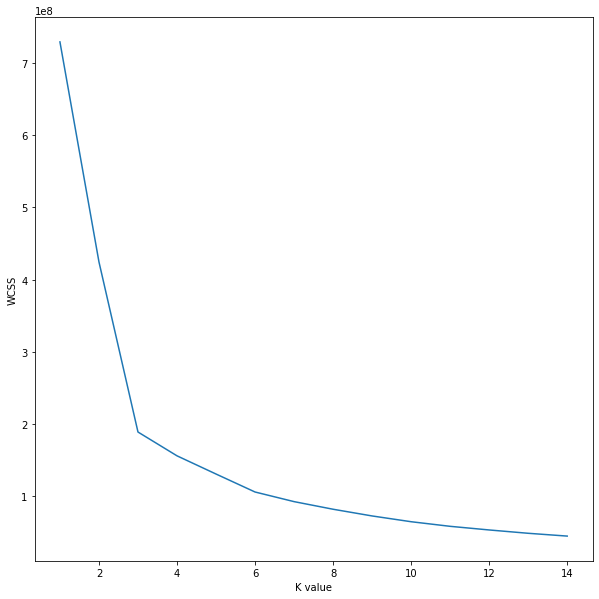

In [179]:
wcss = [] 

for k in range(1, 15):
    kmeansForLoop = KMeans(n_clusters = k)
    kmeansForLoop.fit(dataWithoutLabels)
    wcss.append(kmeansForLoop.inertia_)

plt.figure(figsize = (10, 10))
plt.plot(range(1, 15), wcss)
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()



*   Nilai Elbow dimulai dari 2


In [180]:
dataWithoutLabels = data2.loc[:,['price','availability_365']]
kmeans = KMeans(n_clusters = 2)
clusters = kmeans.fit_predict(dataWithoutLabels)
dataWithoutLabels["type"] = clusters
dataWithoutLabels["type"].unique()

array([0, 1], dtype=int32)



*   Plot data setelah K = 2 clustering



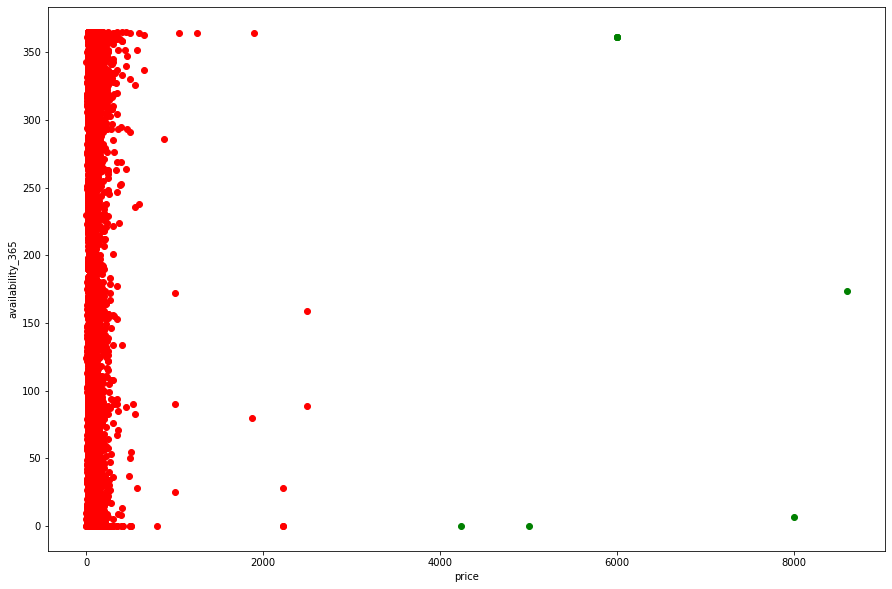

In [181]:
plt.figure(figsize = (15, 10))
plt.scatter(dataWithoutLabels["price"][dataWithoutLabels["type"] == 0], dataWithoutLabels["availability_365"][dataWithoutLabels["type"] == 0], color = "red")
plt.scatter(dataWithoutLabels["price"][dataWithoutLabels["type"] == 1], dataWithoutLabels["availability_365"][dataWithoutLabels["type"] == 1], color = "green")
plt.xlabel('price')
plt.ylabel('availability_365')
plt.show()



*   Data centroids berada di tengah cluster scatters



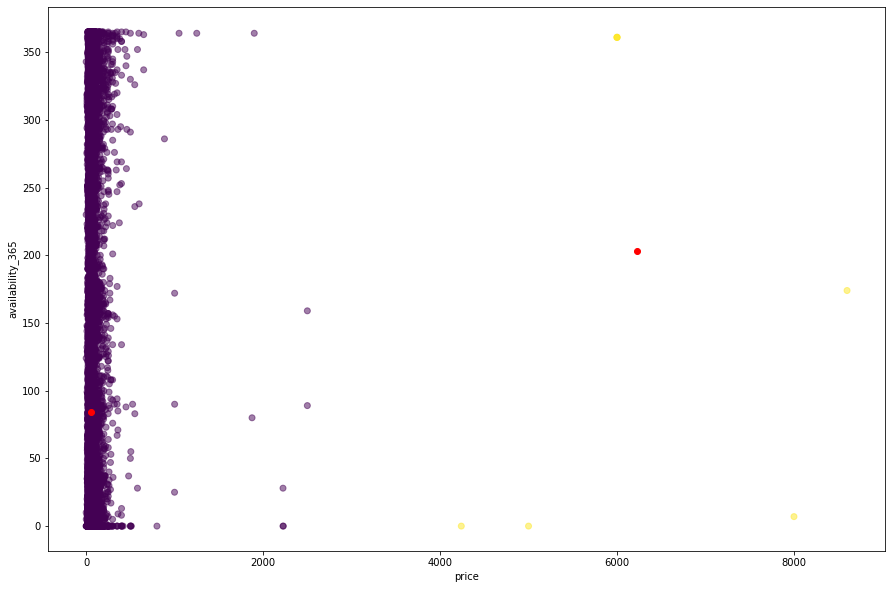

In [182]:
plt.figure(figsize = (15, 10))
plt.scatter(dataWithoutLabels["price"], dataWithoutLabels["availability_365"], c = clusters, alpha = 0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = "red", alpha = 1)
plt.xlabel('price')
plt.ylabel('availability_365')
plt.show()

In [183]:
dataWithoutDiagnosis = data2.drop(["room_type"], axis = 1)
scalar = StandardScaler()
kmeans = KMeans(n_clusters = 2)
pipe = make_pipeline(scalar, kmeans)
pipe.fit(dataWithoutDiagnosis)
labels = pipe.predict(dataWithoutDiagnosis)
df = pd.DataFrame({'labels': labels, "room_type" : data1['room_type']})
ct = pd.crosstab(df['labels'], df['room_type'])
print(ct)

room_type  Entire home/apt  Private room  Shared room
labels                                               
0                     6126          7562          138
1                     2709          1972           80


#Kesimpulan



*   Dari 2 eksprimen yang telah dilakukan, penggunaan fitur yang berbeda, nilai K yang berbeda, menghasilkan hasil yang sangat berbeda, dengan bentuk cluster,letak centroid, jumlah cluster yang berbeda-beda.

